In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('kyphosis.csv')

In [3]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
data.shape

(81, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


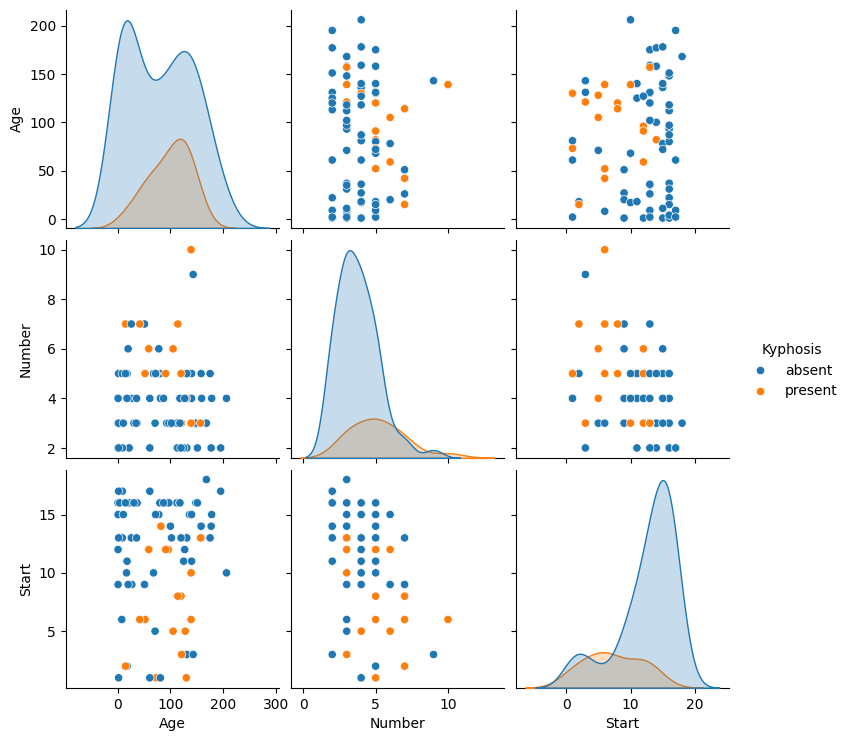

In [7]:
import seaborn as sns
sns.pairplot(data, hue="Kyphosis")

<Axes: xlabel='Kyphosis', ylabel='count'>

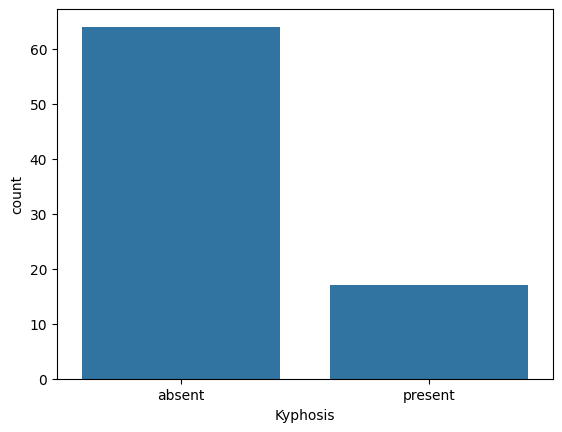

In [8]:
sns.countplot(x='Kyphosis', data=data)

# Data Preprocessing

In [9]:
x = data.drop('Kyphosis', axis=1)
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [10]:
y = data['Kyphosis']
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [13]:
x_train.shape

(56, 3)

In [15]:
x_test.shape

(25, 3)

# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [17]:
pred = model.predict(x_test)
pred

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent'], dtype='<U7')

In [18]:
y_test

41     absent
53     absent
70     absent
75     absent
2     present
28     absent
42     absent
80     absent
25     absent
43     absent
73     absent
0      absent
6      absent
52    present
13     absent
50     absent
32     absent
76    present
63     absent
45    present
16     absent
3      absent
36     absent
71     absent
54     absent
Name: Kyphosis, dtype: object

In [19]:
from sklearn.metrics import accuracy_score
accuracy  = accuracy_score(y_test, pred)
accuracy

0.8

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[18,  3],
       [ 2,  2]], dtype=int64)